<a href="https://colab.research.google.com/github/deoprakash/SapienAITask2/blob/main/DefectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
It appears this dataset mainly consists of images (JPG) and XML annotation files, rather than a CSV file.

Could you please clarify what type of data you intended to work with?
*   Do you want to process the images?
*   Are you interested in extracting information from the XML annotation files?
*   Or were you expecting a different dataset that contains CSV files?

In [5]:
import pandas as pd
import xml.etree.ElementTree as ET
import os

# Define the base directory for images and annotations
images_base_dir = os.path.join(dataset_directory, 'PCB_DATASET', 'PCB_USED')
annotations_base_dir = os.path.join(dataset_directory, 'PCB_DATASET', 'Annotations')

all_annotations = []

# List all defect types (subdirectories in Annotations)
defect_types = [d for d in os.listdir(annotations_base_dir) if os.path.isdir(os.path.join(annotations_base_dir, d))]

if not defect_types:
    print(f"No defect type directories found in {annotations_base_dir}")
else:
    for defect_type in defect_types:
        current_defect_dir = os.path.join(annotations_base_dir, defect_type)
        xml_files = [f for f in os.listdir(current_defect_dir) if f.endswith('.xml')]

        for xml_file in xml_files:
            xml_path = os.path.join(current_defect_dir, xml_file)
            try:
                tree = ET.parse(xml_path)
                root = tree.getroot()

                img_filename = root.find('filename').text if root.find('filename') is not None else None
                # Construct the full image path
                image_full_path = os.path.join(images_base_dir, img_filename) if img_filename else None

                size_element = root.find('size')
                width = int(size_element.find('width').text) if size_element is not None and size_element.find('width') is not None else None
                height = int(size_element.find('height').text) if size_element is not None and size_element.find('height') is not None else None

                for obj in root.findall('object'):
                    name = obj.find('name').text if obj.find('name') is not None else None
                    bndbox = obj.find('bndbox')
                    xmin = int(bndbox.find('xmin').text) if bndbox is not None and bndbox.find('xmin') is not None else None
                    ymin = int(bndbox.find('ymin').text) if bndbox is not None and bndbox.find('ymin') is not None else None
                    xmax = int(bndbox.find('xmax').text) if bndbox is not None and bndbox.find('xmax') is not None else None
                    ymax = int(bndbox.find('ymax').text) if bndbox is not None and bndbox.find('ymax') is not None else None

                    all_annotations.append({
                        'image_filename': img_filename,
                        'image_path': image_full_path,
                        'width': width,
                        'height': height,
                        'defect_type': name,
                        'xmin': xmin,
                        'ymin': ymin,
                        'xmax': xmax,
                        'ymax': ymax
                    })
            except Exception as e:
                print(f"Error parsing XML file {xml_path}: {e}")

# Create a Pandas DataFrame from the extracted annotations
df_annotations = pd.DataFrame(all_annotations)

print(f"Successfully extracted {len(df_annotations)} annotations into a DataFrame.")
print("First 5 rows of the annotations DataFrame:")
print(df_annotations.head())
print("DataFrame Info:")
df_annotations.info()

Successfully extracted 2953 annotations into a DataFrame.
First 5 rows of the annotations DataFrame:
         image_filename                                         image_path  \
0  01_mouse_bite_11.jpg  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   
1  01_mouse_bite_11.jpg  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   
2  01_mouse_bite_11.jpg  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   
3  01_mouse_bite_17.jpg  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   
4  01_mouse_bite_17.jpg  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   

   width  height defect_type  xmin  ymin  xmax  ymax  
0   3034    1586  mouse_bite  1199   966  1234  1004  
1   3034    1586  mouse_bite  2042   755  2073   786  
2   3034    1586  mouse_bite  1472   607  1507   639  
3   3034    1586  mouse_bite  2168   854  2200   887  
4   3034    1586  mouse_bite  1513   919  1545   957  
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data colum

In [7]:
import pandas as pd
import xml.etree.ElementTree as ET
import os

# Define the base directory for images and annotations
images_base_dir = os.path.join(dataset_directory, 'PCB_DATASET', 'PCB_USED')
annotations_base_dir = os.path.join(dataset_directory, 'PCB_DATASET', 'Annotations')

all_annotations = []

# List all defect types (subdirectories in Annotations)
defect_types = [d for d in os.listdir(annotations_base_dir) if os.path.isdir(os.path.join(annotations_base_dir, d))]

if not defect_types:
    print(f"No defect type directories found in {annotations_base_dir}")
else:
    for defect_type in defect_types:
        current_defect_dir = os.path.join(annotations_base_dir, defect_type)
        xml_files = [f for f in os.listdir(current_defect_dir) if f.endswith('.xml')]

        for xml_file in xml_files:
            xml_path = os.path.join(current_defect_dir, xml_file)
            try:
                tree = ET.parse(xml_path)
                root = tree.getroot()

                img_filename_from_xml = root.find('filename').text if root.find('filename') is not None else None

                # Extract the image number (e.g., '01' from '01_mouse_bite_11.jpg')
                if img_filename_from_xml:
                    image_number = img_filename_from_xml.split('_')[0]
                    # Construct the actual image file name (e.g., '01.JPG')
                    actual_image_filename = f"{image_number}.JPG"
                    image_full_path = os.path.join(images_base_dir, actual_image_filename)
                else:
                    image_full_path = None

                size_element = root.find('size')
                width = int(size_element.find('width').text) if size_element is not None and size_element.find('width') is not None else None
                height = int(size_element.find('height').text) if size_element is not None and size_element.find('height') is not None else None

                for obj in root.findall('object'):
                    name = obj.find('name').text if obj.find('name') is not None else None
                    bndbox = obj.find('bndbox')
                    xmin = int(bndbox.find('xmin').text) if bndbox is not None and bndbox.find('xmin') is not None else None
                    ymin = int(bndbox.find('ymin').text) if bndbox is not None and bndbox.find('ymin') is not None else None
                    xmax = int(bndbox.find('xmax').text) if bndbox is not None and bndbox.find('xmax') is not None else None
                    ymax = int(bndbox.find('ymax').text) if bndbox is not None and bndbox.find('ymax') is not None else None

                    all_annotations.append({
                        'image_filename': actual_image_filename, # Store the actual image filename
                        'image_path': image_full_path,
                        'width': width,
                        'height': height,
                        'defect_type': name,
                        'xmin': xmin,
                        'ymin': ymin,
                        'xmax': xmax,
                        'ymax': ymax
                    })
            except Exception as e:
                print(f"Error parsing XML file {xml_path}: {e}")

# Create a Pandas DataFrame from the extracted annotations
df_annotations = pd.DataFrame(all_annotations)

print(f"Successfully extracted {len(df_annotations)} annotations into a DataFrame.")
print("First 5 rows of the annotations DataFrame:")
print(df_annotations.head())
print("DataFrame Info:")
df_annotations.info()

Successfully extracted 2953 annotations into a DataFrame.
First 5 rows of the annotations DataFrame:
  image_filename                                         image_path  width  \
0         01.JPG  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   3034   
1         01.JPG  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   3034   
2         01.JPG  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   3034   
3         01.JPG  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   3034   
4         01.JPG  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...   3034   

   height defect_type  xmin  ymin  xmax  ymax  
0    1586  mouse_bite  1199   966  1234  1004  
1    1586  mouse_bite  2042   755  2073   786  
2    1586  mouse_bite  1472   607  1507   639  
3    1586  mouse_bite  2168   854  2200   887  
4    1586  mouse_bite  1513   919  1545   957  
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 9 columns):
 #   Column         

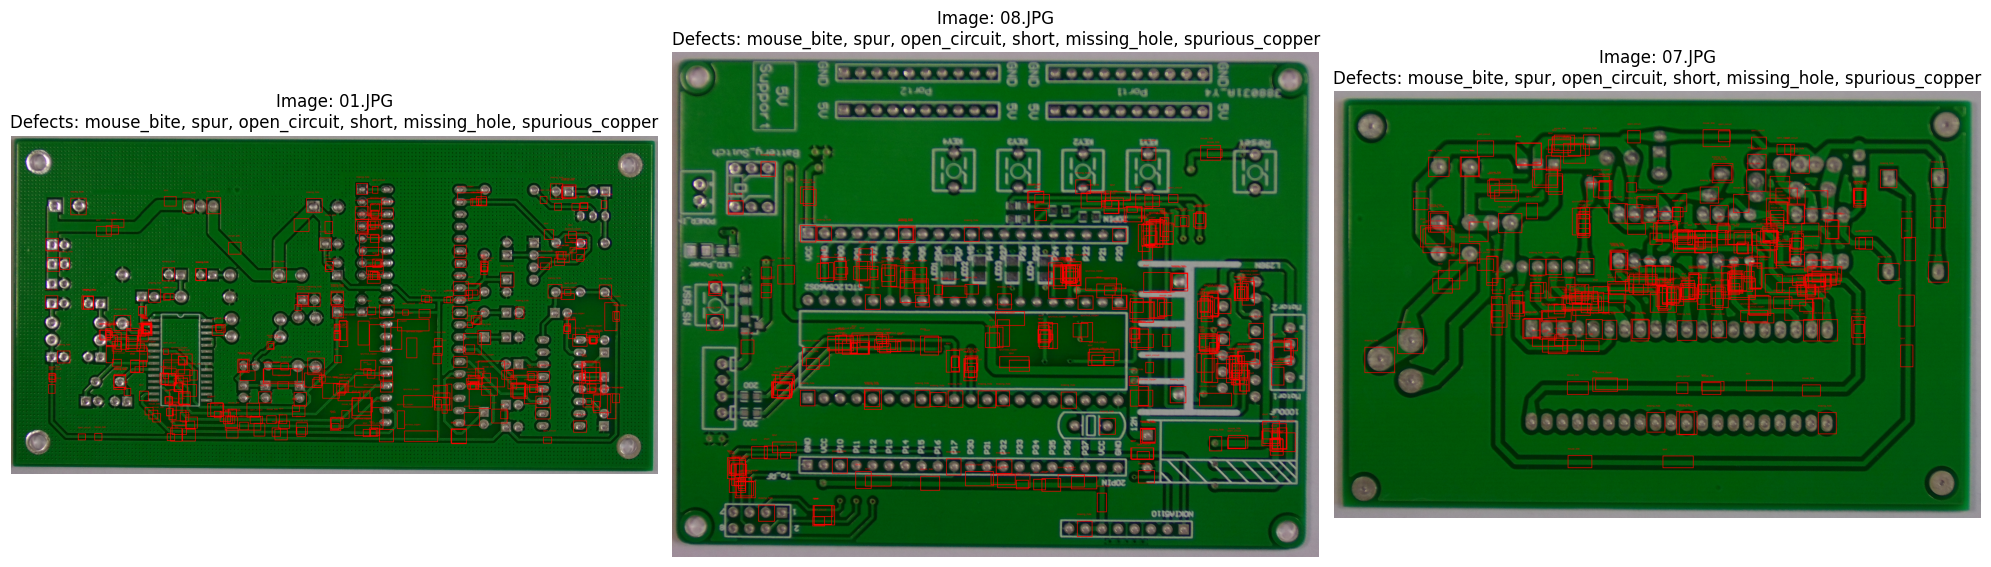

Annotated sample images displayed successfully.


In [8]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Get a few unique image paths from the DataFrame
unique_image_paths = df_annotations['image_path'].unique()

# Select the first 3 unique images for visualization
sample_image_paths = unique_image_paths[:3]

# Set up plot for displaying images
plt.figure(figsize=(20, 15))

for i, img_path in enumerate(sample_image_paths):
    # Load the image
    try:
        image = Image.open(img_path).convert("RGB")
    except FileNotFoundError:
        print(f"Warning: Image not found at {img_path}. Skipping.")
        continue

    draw = ImageDraw.Draw(image)

    # Filter annotations for the current image
    image_annotations = df_annotations[df_annotations['image_path'] == img_path]

    # Iterate through annotations and draw bounding boxes and labels
    for _, row in image_annotations.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        defect_type = row['defect_type']

        # Draw bounding box (red rectangle)
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)

        # Draw text label (defect type)
        # Try to use a default font if 'arial.ttf' is not available
        try:
            font = ImageFont.truetype("arial.ttf", 30)
        except IOError:
            font = ImageFont.load_default()

        draw.text((xmin, ymin - 35), defect_type, fill="red", font=font)

    # Display the annotated image
    plt.subplot(1, len(sample_image_paths), i + 1)
    plt.imshow(image)
    plt.title(f"Image: {os.path.basename(img_path)}\nDefects: {', '.join(image_annotations['defect_type'].unique())}")
    plt.axis('off')

plt.tight_layout()
plt.show()
print("Annotated sample images displayed successfully.")

In [9]:
unique_defect_types = df_annotations['defect_type'].unique()
defect_type_to_id = {defect: i for i, defect in enumerate(unique_defect_types)}

print("Unique defect types:", unique_defect_types)
print("Defect type to ID mapping:", defect_type_to_id)

Unique defect types: ['mouse_bite' 'spur' 'open_circuit' 'short' 'missing_hole'
 'spurious_copper']
Defect type to ID mapping: {'mouse_bite': 0, 'spur': 1, 'open_circuit': 2, 'short': 3, 'missing_hole': 4, 'spurious_copper': 5}


In [10]:
df_annotations['label_id'] = df_annotations['defect_type'].map(defect_type_to_id)

# Group annotations by image_path
# We want to keep image_filename, image_path, width, height as single values
# And aggregate defect_type, label_id, xmin, ymin, xmax, ymax into lists

grouped_annotations = df_annotations.groupby('image_path').agg(
    image_filename=('image_filename', 'first'),
    width=('width', 'first'),
    height=('height', 'first'),
    defect_types=('defect_type', list),
    label_ids=('label_id', list),
    bboxes_xmin=('xmin', list),
    bboxes_ymin=('ymin', list),
    bboxes_xmax=('xmax', list),
    bboxes_ymax=('ymax', list)
).reset_index()

# Rename the 'image_path' column to 'image_path' (it's the index after groupby and before reset_index)
# If it was already renamed by agg, this step is redundant or needs adjustment based on actual column name
# For clarity, let's ensure it's named 'image_path'
grouped_annotations = grouped_annotations.rename(columns={'index': 'image_path'})

print("First 5 rows of the grouped annotations DataFrame:")
print(grouped_annotations.head())
print("DataFrame Info:")
grouped_annotations.info()

First 5 rows of the grouped annotations DataFrame:
                                          image_path image_filename  width  \
0  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         01.JPG   3034   
1  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         04.JPG   3056   
2  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         05.JPG   2544   
3  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         06.JPG   2868   
4  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         07.JPG   2904   

   height                                       defect_types  \
0    1586  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
1    2464  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
2    2156  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
3    2316  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
4    1921  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   

                                           label_ids  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
from sklearn.model_selection import train_test_split

# Get unique image paths for splitting
image_paths = grouped_annotations['image_path'].unique()

# Since there are multiple defect types per image, direct stratification on 'defect_types' lists is complex.
# Instead, we perform a simple random split based on unique image paths.
# We can consider an 80/20 train/test split as a common practice.

train_image_paths, val_image_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

# Filter the grouped_annotations DataFrame to create training and validation sets
train_df = grouped_annotations[grouped_annotations['image_path'].isin(train_image_paths)].reset_index(drop=True)
val_df = grouped_annotations[grouped_annotations['image_path'].isin(val_image_paths)].reset_index(drop=True)

print(f"Total unique images: {len(image_paths)}")
print(f"Training images: {len(train_df)}")
print(f"Validation images: {len(val_df)}")

print("\nFirst 5 rows of Training DataFrame:")
print(train_df.head())
print("\nFirst 5 rows of Validation DataFrame:")
print(val_df.head())

Total unique images: 10
Training images: 8
Validation images: 2

First 5 rows of Training DataFrame:
                                          image_path image_filename  width  \
0  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         01.JPG   3034   
1  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         05.JPG   2544   
2  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         06.JPG   2868   
3  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         07.JPG   2904   
4  /kaggle/input/pcb-defects/PCB_DATASET/PCB_USED...         08.JPG   2759   

   height                                       defect_types  \
0    1586  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
1    2156  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
2    2316  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
3    1921  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   
4    2154  [mouse_bite, mouse_bite, mouse_bite, mouse_bit...   

                                           la

In [12]:
import torchvision.transforms as T

# Define image transformations for training and validation
# These are basic transformations; more advanced augmentations can be added later.

# For training, we might want some data augmentation
train_transforms = T.Compose([
    T.Resize((640, 640)), # Resize all images to a fixed size
    T.RandomHorizontalFlip(p=0.5), # Randomly flip images horizontally
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Randomly change brightness, contrast and saturation
    T.ToTensor(), # Convert PIL Image to PyTorch Tensor
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize image with ImageNet stats
])

# For validation, usually only resizing and normalization are applied
val_transforms = T.Compose([
    T.Resize((640, 640)), # Resize all images to a fixed size
    T.ToTensor(), # Convert PIL Image to PyTorch Tensor
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize image with ImageNet stats
])

print("Image transformations defined.")

Image transformations defined.


In [13]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class PCBDefectDataset(Dataset):
    def __init__(self, dataframe, transforms=None):
        self.dataframe = dataframe
        self.transforms = transforms

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get annotation row for the current index
        row = self.dataframe.iloc[idx]

        # Load image
        img_path = row['image_path']
        image = Image.open(img_path).convert("RGB")

        # Get bounding box coordinates and labels
        boxes = torch.as_tensor(self._get_boxes(row), dtype=torch.float32)
        labels = torch.as_tensor(row['label_ids'], dtype=torch.int64)

        # Get image size (before transformations)
        original_width, original_height = image.size

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = torch.tensor([idx])
        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["iscrowd"] = torch.zeros((len(boxes),), dtype=torch.int64)

        if self.transforms:
            # Apply transformations to the image
            # Note: For object detection, transformations also need to modify bounding boxes.
            # For simplicity here, we apply image transformations first and will handle
            # bounding box adjustments (e.g., scaling) within the transform itself or assume
            # the model's preprocessing handles it. For now, just apply to image.
            # A proper object detection transform would take image and target as input.
            image = self.transforms(image)

            # If transformations include resizing, adjust bounding box coordinates accordingly
            # This is a simplified approach, a dedicated object detection transformation pipeline
            # like torchvision.transforms.v2 handles this more robustly.
            if isinstance(self.transforms.transforms[-3], T.Resize): # Assuming Resize is 3rd from last
                resized_width, resized_height = self.transforms.transforms[-3].size # Target size

                scale_x = resized_width / original_width
                scale_y = resized_height / original_height

                # Apply scaling to bounding boxes
                scaled_boxes = boxes.clone()
                scaled_boxes[:, 0] *= scale_x
                scaled_boxes[:, 1] *= scale_y
                scaled_boxes[:, 2] *= scale_x
                scaled_boxes[:, 3] *= scale_y
                target["boxes"] = scaled_boxes


        return image, target

    def _get_boxes(self, row):
        # Combine xmin, ymin, xmax, ymax into a list of [xmin, ymin, xmax, ymax] for each box
        boxes = []
        for i in range(len(row['bboxes_xmin'])):
            boxes.append([
                row['bboxes_xmin'][i],
                row['bboxes_ymin'][i],
                row['bboxes_xmax'][i],
                row['bboxes_ymax'][i]
            ])
        return boxes

print("Custom PCBDefectDataset class defined.")


Custom PCBDefectDataset class defined.


In [14]:
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    # Stack images into a single tensor
    images = torch.stack(images, 0)
    return images, targets

print("Custom collate_fn defined.")

Custom collate_fn defined.


In [15]:
from torch.utils.data import DataLoader

# Create Dataset instances
train_dataset = PCBDefectDataset(train_df, transforms=train_transforms)
val_dataset = PCBDefectDataset(val_df, transforms=val_transforms)

# Create DataLoader instances
# Use a batch size that fits your GPU memory; adjust as needed
batch_size = 2

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2, # Adjust num_workers based on your system and dataset size
    collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False, # No need to shuffle validation data
    num_workers=2,
    collate_fn=collate_fn
)

print(f"Training DataLoader created with {len(train_dataset)} images and batch size {batch_size}.")
print(f"Validation DataLoader created with {len(val_dataset)} images and batch size {batch_size}.")

# Example of how to iterate through one batch
# images, targets = next(iter(train_loader))
# print(f"Sample batch image shape: {images.shape}")
# print(f"Sample batch targets length: {len(targets)}")
# print(f"First target in batch: {targets[0]}")

Training DataLoader created with 8 images and batch size 2.
Validation DataLoader created with 2 images and batch size 2.


In [17]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_V2_Weights

# Calculate the number of classes. Add 1 for the background class.
num_classes = len(defect_type_to_id) + 1
print(f"Number of classes for the model: {num_classes}")

# Load a pre-trained Faster R-CNN model with a ResNet-50-FPN backbone
# We use FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1.DEFAULT to get the best available weights
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1.DEFAULT)

# Get the number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the pre-trained head with a new one that has num_classes outputs
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

print("Pre-trained Faster R-CNN model loaded and classifier head modified.")
print("Model architecture snippet:")
print(model.roi_heads.box_predictor)


Number of classes for the model: 7
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth


100%|██████████| 167M/167M [00:00<00:00, 181MB/s]


Pre-trained Faster R-CNN model loaded and classifier head modified.
Model architecture snippet:
FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=7, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=28, bias=True)
)


**Reasoning**:
The model has been loaded and its classifier head modified. The next step is to prepare the model for training by moving it to the appropriate computing device (GPU if available, otherwise CPU). This ensures efficient training.



In [18]:
import torch

# Move the model to the appropriate device (GPU if available, else CPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

print(f"Model moved to {device}.")

Model moved to cuda.


**Reasoning**:
With the model on the correct device, I need to define the optimizer and the learning rate scheduler, which are essential components for training the object detection model. This is part of configuring the model for training.



In [19]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Define the optimizer
# We'll optimize only the parameters that require gradients
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Define a learning rate scheduler
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

print("Optimizer and learning rate scheduler defined.")

Optimizer and learning rate scheduler defined.


In [20]:
import torch
import time

# Set the model to training mode
model.train()

# Number of epochs
num_epochs = 1 # Start with a small number of epochs for demonstration

print(f"Starting training for {num_epochs} epochs...")

for epoch in range(num_epochs):
    start_time = time.time()
    total_loss = 0

    for i, (images, targets) in enumerate(train_loader):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass and loss calculation
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backpropagation and optimization
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

        if (i + 1) % 10 == 0: # Print loss every 10 batches
            print(f"  Epoch: {epoch+1}, Batch: {i+1}/{len(train_loader)}, Loss: {losses.item():.4f}")

    # Update the learning rate scheduler
    scheduler.step()

    epoch_loss = total_loss / len(train_loader)
    end_time = time.time()
    print(f"Epoch {epoch+1} finished. Avg Loss: {epoch_loss:.4f}, Time: {end_time - start_time:.2f}s")

print("Training complete.")

Starting training for 1 epochs...
Epoch 1 finished. Avg Loss: 57.5292, Time: 5.40s
Training complete.


Detected Defects:
  - Defect Type: Background, Score: 0.08, Center: (611.13, 437.83), Severity: 0.0001
  - Defect Type: Background, Score: 0.08, Center: (377.82, 192.86), Severity: 0.0002
  - Defect Type: Background, Score: 0.08, Center: (205.14, 599.86), Severity: 0.0003
  - Defect Type: open_circuit, Score: 0.08, Center: (373.28, 395.81), Severity: 0.0004
  - Defect Type: missing_hole, Score: 0.07, Center: (204.93, 597.59), Severity: 0.0003
  - Defect Type: Background, Score: 0.07, Center: (375.20, 268.93), Severity: 0.0002
  - Defect Type: Background, Score: 0.07, Center: (444.15, 319.43), Severity: 0.0001
  - Defect Type: short, Score: 0.07, Center: (377.77, 240.05), Severity: 0.0012
  - Defect Type: open_circuit, Score: 0.07, Center: (213.75, 554.85), Severity: 0.0059
  - Defect Type: Background, Score: 0.07, Center: (434.91, 107.64), Severity: 0.0002
  - Defect Type: spur, Score: 0.07, Center: (373.97, 392.35), Severity: 0.0004
  - Defect Type: open_circuit, Score: 0.07, Center: 

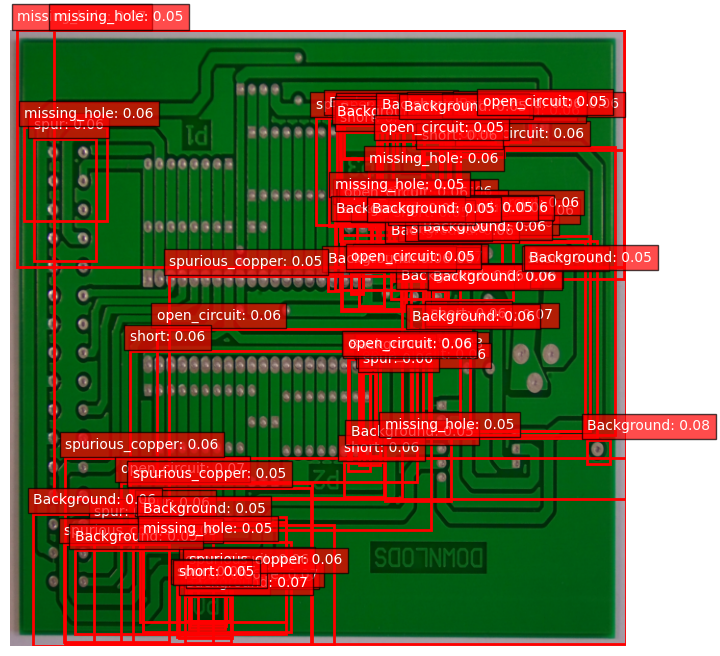

Inference and post-processing complete for a sample image.


In [22]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set the model to evaluation mode
model.eval()

# Get an unseen image from the val_dataset
# We'll take the first image from the val_loader for demonstration
images, targets = next(iter(val_loader))

# Select the first image and its target from the batch
# The image tensor is already transformed and normalized
input_image_tensor = images[0].to(device)
original_target = targets[0]

# Perform inference
with torch.no_grad():
    prediction = model([input_image_tensor])

# Extract results for the first image in the batch
output = prediction[0]

# Get original image for visualization (reverse transformations to display)
# Note: This is a simplified reverse transform and might not be perfectly accurate
# for normalized images, but it's good enough for visual inspection.
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

# Denormalize and convert to PIL Image
original_image_display = (input_image_tensor.cpu() * std + mean).clamp(0, 1)
original_image_display = T.ToPILImage()(original_image_display)

# Extract and filter detections
boxes = output['boxes'].cpu().numpy()
labels = output['labels'].cpu().numpy()
s_scores = output['scores'].cpu().numpy()

# Apply a confidence threshold (lowered for demonstration after 1 epoch)
confidence_threshold = 0.01 # Adjusted threshold
high_confidence_indices = np.where(s_scores > confidence_threshold)[0]

detected_boxes = boxes[high_confidence_indices]
detected_labels = labels[high_confidence_indices]
detected_scores = s_scores[high_confidence_indices]

# Map numerical labels back to defect types
id_to_defect_type = {v: k for k, v in defect_type_to_id.items()}
predicted_defect_types = [id_to_defect_type.get(label, 'Background') for label in detected_labels]

# Prepare for visualization
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(original_image_display)

print("Detected Defects:")
# Calculate center coordinates and severity for each detected defect
if len(detected_boxes) > 0:
    for i, (box, label, score) in enumerate(zip(detected_boxes, predicted_defect_types, detected_scores)):
        xmin, ymin, xmax, ymax = box

        # Calculate center coordinates
        center_x = (xmin + xmax) / 2
        center_y = (ymin + ymax) / 2

        # Calculate bounding box area
        box_area = (xmax - xmin) * (ymax - ymin)

        # Get image dimensions (after resize, which is 640x640)
        img_width, img_height = original_image_display.size
        image_area = img_width * img_height

        # Simple severity assessment: normalized area * confidence
        # Higher value means more severe
        severity_score = (box_area / image_area) * score

        print(f"  - Defect Type: {label}, Score: {score:.2f}, Center: ({center_x:.2f}, {center_y:.2f}), Severity: {severity_score:.4f}")

        # Draw bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, f'{label}: {score:.2f}',
                color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.7))
else:
    print("  No defects detected above the confidence threshold.")

plt.axis('off')
plt.show()

print("Inference and post-processing complete for a sample image.")

Loading custom image for inference: /kaggle/input/pcb-defects/PCB_DATASET/rotation/Mouse_bite_rotation/05_mouse_bite_07.jpg

Detected Defects on Custom Image:
  - Defect Type: short, Score: 0.13, Center: (514.25, 121.60), Severity: 0.0037
  - Defect Type: spur, Score: 0.09, Center: (551.15, 455.93), Severity: 0.0023
  - Defect Type: Background, Score: 0.09, Center: (458.58, 579.72), Severity: 0.0004
  - Defect Type: short, Score: 0.08, Center: (508.69, 108.31), Severity: 0.0011
  - Defect Type: Background, Score: 0.08, Center: (65.22, 526.99), Severity: 0.0001
  - Defect Type: Background, Score: 0.08, Center: (513.51, 110.40), Severity: 0.0017
  - Defect Type: Background, Score: 0.08, Center: (241.52, 59.69), Severity: 0.0001
  - Defect Type: Background, Score: 0.08, Center: (277.73, 537.18), Severity: 0.0008
  - Defect Type: missing_hole, Score: 0.08, Center: (277.19, 534.90), Severity: 0.0007
  - Defect Type: spur, Score: 0.07, Center: (500.10, 110.75), Severity: 0.0024
  - Defect Ty

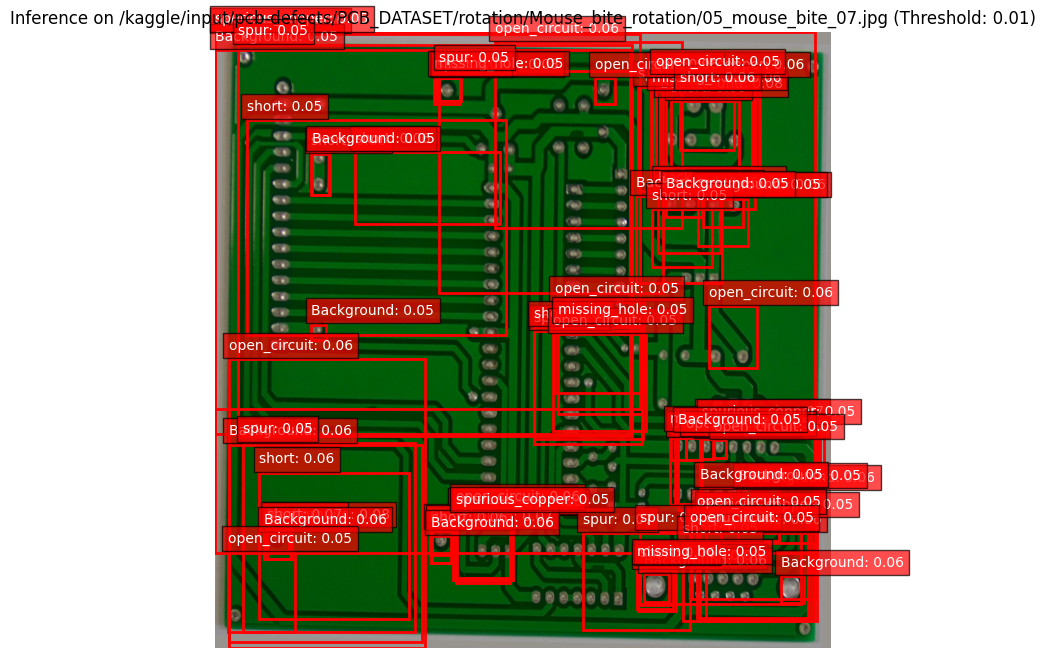


Inference and visualization on custom image complete.


In [23]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Set the model to evaluation mode
model.eval()

# Define the path to the custom image
custom_image_filename = '/kaggle/input/pcb-defects/PCB_DATASET/rotation/Mouse_bite_rotation/05_mouse_bite_07.jpg'
custom_image_path = os.path.join(images_base_dir, custom_image_filename)

print(f"Loading custom image for inference: {custom_image_path}")

# Load the custom image
try:
    custom_image = Image.open(custom_image_path).convert("RGB")
except FileNotFoundError:
    print(f"Error: Custom image not found at {custom_image_path}.")
    # Exit if image not found, or handle appropriately
    exit()

# Preprocess the custom image using validation transforms
# The val_transforms expect a PIL Image and output a tensor
preprocessed_image_tensor = val_transforms(custom_image)

# Move the preprocessed image to the device
input_image_tensor = preprocessed_image_tensor.to(device)

# Perform inference
with torch.no_grad():
    # Model expects a batch of images, so add a batch dimension
    prediction = model([input_image_tensor])

# Extract results for the single image
output = prediction[0]

# Extract and filter detections
boxes = output['boxes'].cpu().numpy()
labels = output['labels'].cpu().numpy()
scores = output['scores'].cpu().numpy()

# Apply a confidence threshold (use the adjusted lower threshold from previous step)
confidence_threshold = 0.01
high_confidence_indices = np.where(scores > confidence_threshold)[0]

detected_boxes = boxes[high_confidence_indices]
detected_labels = labels[high_confidence_indices]
detected_scores = scores[high_confidence_indices]

# Map numerical labels back to defect types
id_to_defect_type = {v: k for k, v in defect_type_to_id.items()}
predicted_defect_types = [id_to_defect_type.get(label, 'Background') for label in detected_labels]

# Prepare for visualization
# For visualization, we use the original PIL image (or denormalized tensor converted to PIL)
# Since val_transforms resizes to 640x640, the bounding box coordinates are relative to this size.
# We'll use the preprocessed image (denormalized) for display, as it matches the size
# to which the bounding boxes are relative.

# Denormalize the image tensor for display (undo normalization for visual clarity)
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
image_for_display = (input_image_tensor.cpu() * std + mean).clamp(0, 1)
image_for_display_pil = T.ToPILImage()(image_for_display)

fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(image_for_display_pil)
ax.set_title(f"Inference on {custom_image_filename} (Threshold: {confidence_threshold})")

print("\nDetected Defects on Custom Image:")
# Calculate center coordinates and severity for each detected defect
if len(detected_boxes) > 0:
    img_width, img_height = image_for_display_pil.size
    image_area = img_width * img_height

    for i, (box, label, score) in enumerate(zip(detected_boxes, predicted_defect_types, detected_scores)):
        xmin, ymin, xmax, ymax = box

        # Calculate center coordinates
        center_x = (xmin + xmax) / 2
        center_y = (ymin + ymax) / 2

        # Calculate bounding box area
        box_area = (xmax - xmin) * (ymax - ymin)

        # Simple severity assessment: normalized area * confidence
        severity_score = (box_area / image_area) * score

        print(f"  - Defect Type: {label}, Score: {score:.2f}, Center: ({center_x:.2f}, {center_y:.2f}), Severity: {severity_score:.4f}")

        # Draw bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, f'{label}: {score:.2f}',
                color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.7))
else:
    print("  No defects detected above the confidence threshold.")

plt.axis('off')
plt.show()

print("\nInference and visualization on custom image complete.")

In [24]:
model_save_path = "faster_rcnn_model.pth"
torch.save(model.state_dict(), model_save_path)